In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def load_file(W, e):
    data = []
    fn = "dis_avg_overlap_W_{:05.4f}_L_32_l_3_e_{:03.2f}.txt".format(W, e)
    with open(fn, 'r') as f:
        for line in f:
            data.append(float(line))
    return data

<IPython.core.display.Javascript object>


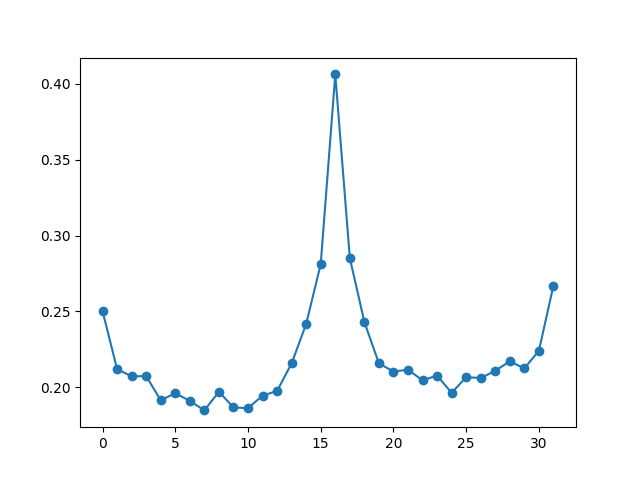

In [3]:
%matplotlib notebook
data = load_file(0.0001, .5)
plt.plot(data, 'o-')
plt.show()

In [4]:
W_list = [0.0001, 0.33, 0.66, 1, 1.33, 1.66, 2, 2.33, 2.66, 3, 3.33, 3.66, 4, 4.33, 4.66, 5, 6, 7, 8, 9, 10]
e = 0.5

<IPython.core.display.Javascript object>


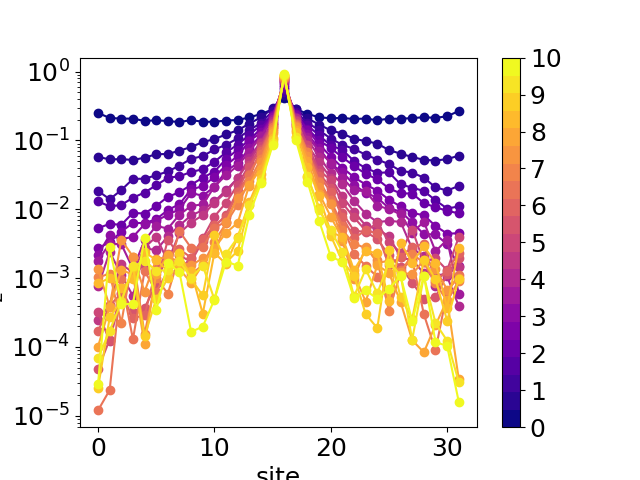

In [7]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
cmap = plt.get_cmap("plasma",len(W_list))
for W_idx, W in enumerate(W_list):
    data = load_file(W, e)
    plt.semilogy(data, 'o-', label="W = {}".format(W),color= cmap(W_idx))
plt.xlabel(r"site")
plt.ylabel(r"$\frac{1}{2}$Tr$\left(\rho - \sigma\right)$")
#plt.legend(loc='best')
norm = plt.Normalize(0,10)
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array(W_list)
plt.colorbar(sm, ticks=range(0,11))
plt.show()

In [9]:
def get_r_data(data):
    L = len(data)
    r_list = []
    for i in range(L//2):
        r = .5*(data[L//2-i] + data[L//2+i])
        r_list.append(r)
    return r_list

<IPython.core.display.Javascript object>


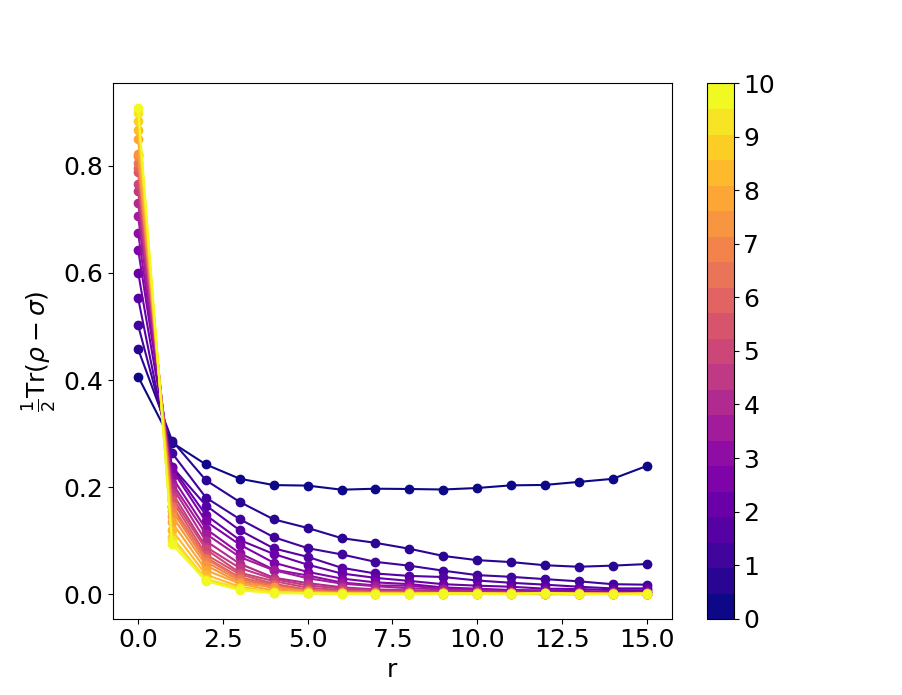

In [11]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
cmap = plt.get_cmap("plasma",len(W_list))
for W_idx, W in enumerate(W_list):
    data = load_file(W, e)
    r_list = get_r_data(data)
    plt.plot(r_list, 'o-', label="W = {}".format(W),color= cmap(W_idx))
plt.xlabel(r"r")
plt.ylabel(r"$\frac{1}{2}$Tr$\left(\rho - \sigma\right)$")
#plt.legend(loc='best')
norm = plt.Normalize(0,10)
sm = plt.cm.ScalarMappable(norm=norm,cmap=cmap)
sm.set_array(W_list)
plt.colorbar(sm, ticks=range(0,11))
plt.show()

In [59]:
def get_slope(r_list, n=6):
    x = range(1,n)
    y = np.log10(r_list[1:n])
    m, b = np.polyfit(x, y, 1)
    return m

<IPython.core.display.Javascript object>


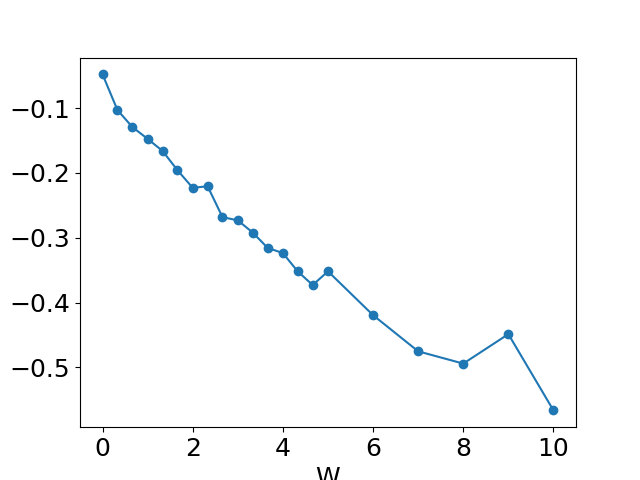

In [63]:
%matplotlib notebook
m_list = []
for W_idx, W in enumerate(W_list):
    data = load_file(W, e)
    r_list = get_r_data(data)
    m = get_slope(r_list, 5)
    m_list.append(m)
plt.plot(W_list, m_list, 'o-')
plt.xlabel("W")
plt.ylabel("m")
plt.show()